In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 載入資料集
from sklearn import datasets
# 資料分割成training與testing資料集
from sklearn.model_selection import train_test_split

In [3]:
# 載入模型
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [4]:
# 載入資料
raw_iris = datasets.load_iris()
print(raw_iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
# 印出字典的Key值
raw_iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
raw_iris["feature_names"]
#        花萼長度         花萼寬度        花瓣長度         花瓣寬度
cols = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]

In [7]:
raw_iris["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
raw_iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
raw_iris["target"][:5]

array([0, 0, 0, 0, 0])

In [10]:
print(raw_iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
# 將data資料轉換成Pandas DataFrame格式，並指定欄位名稱
df_X = pd.DataFrame(raw_iris["data"])
df_X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
# 將target資料轉換成Pandas DataFrame格式，並指定欄位名稱
df_y = pd.DataFrame(raw_iris["target"])
df_y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [13]:
raw_iris["data"][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [14]:
sns.set_style("whitegrid")

Text(0, 0.5, 'Sepal Width')

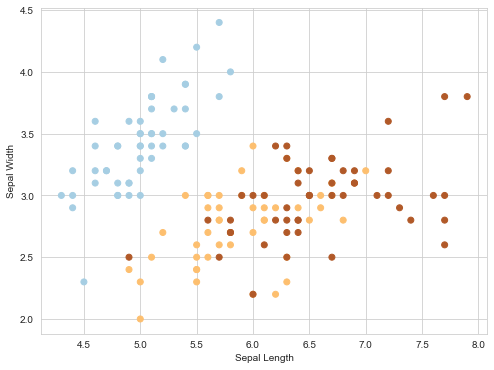

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(raw_iris["data"][:, 0], raw_iris["data"][:, 1],
            c=raw_iris["target"], cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

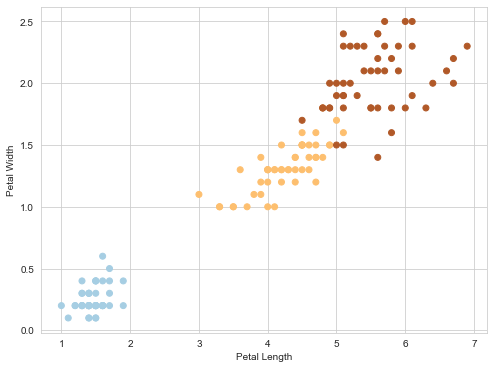

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(raw_iris["data"][:, 2], raw_iris["data"][:, 3], 
            c=raw_iris["target"], cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [17]:
# 資料切分
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [18]:
train_X.shape

(105, 4)

In [19]:
test_X.shape

(45, 4)

In [20]:
# LinearSVC
lin_svc = LinearSVC()
# 使用fit來建置模型
lin_svc.fit(train_X, train_y.values.ravel())

c:\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [21]:
print(lin_svc.predict(test_X))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [22]:
# 準確率
print(lin_svc.score(test_X, test_y))

1.0


In [23]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y.values.ravel())

KNeighborsClassifier()

In [24]:
print(knn.predict(test_X))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [25]:
print(knn.predict_proba(test_X))

[[0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  0.6 0.4]
 [0.  1.  0. ]
 [0.  0.2 0.8]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.8 0.2]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.2 0.8]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.4 0.6]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.2 0.8]
 [0.  0.8 0.2]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]]


In [26]:
print(knn.score(test_X, test_y))

1.0
